In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.data.shape

(569, 30)

In [5]:
cancer.feature_names
#从病灶造影图片，提取了10个关键属性
#radius:半径
#texture:纹理 
#primeter:周长 
#area：面积
#smoothness:平滑度，半径的变化幅度
#compactness:密实度，周长的平方除以面积的商再减一
#concavity:凹度，凹陷部分轮廓的严重程度
#concave points:凹点，凹陷轮廓的数量
#symmetry:对称性
#fractal dimension:分形维度

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
cancer.target_names
#0 恶性的   1良性的

array(['malignant', 'benign'], dtype='<U9')

<AxesSubplot:>

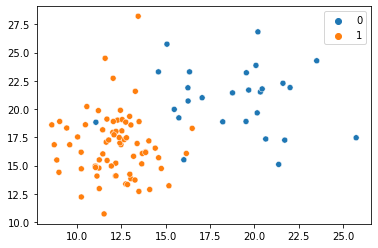

In [7]:
sns.scatterplot(x=cancer.data[300:400,0],y = cancer.data[300:400,1],hue=cancer.target[300:400])

In [8]:
X = cancer.data[300:400,0:2]

In [9]:
y = cancer.target[300:400]

In [10]:
# 请帮我计算一个LR。。。。。。。
# y_hat = sigmoid(a0+a1*x1+a2*x2)
#损失函数 L = sum(ylog(sigmoid(a0+a1*x1+a2*x2)) + (1-y)log(1-(sigmoid(a0+a1*x1+a2*x2)))) + L1/L2

# L1 =|a0|+|a1|+|a2|
# L2 = (ao)^2+(a1)^2+(a2)^2

# a0_ = a0 - L/a0
# a1_ = a1 -L/a1
# a2_ = a2 -L/a2

# 目的：L/a0 L/a1 L/a2

In [11]:
# def L0_ao(X,y,a0,a1,a2):
    
#     L0_a0 '(a0)= (sum(ylog(sigmoid(a0+a1*x1+a2*x2)) + (1-y)log(1-(sigmoid(a0+a1*x1+a2*x2)))))'
    
#     return  LO_a0 

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr_ = LogisticRegression(penalty='l2' # 正则项
                          ,tol =  0.0001  #收敛域
                          ,C = 1       # 正则强度
                          ,fit_intercept=True   # 要不要截距项
                          ,max_iter=100
                         ,solver='lbfgs' # 梯度下降算子，L2：'lbfgs'，L1 ：'liblinear'
                        )
lr_.fit(X,y)

LogisticRegression(C=1)

In [14]:
lr_.score(X,y)

0.96

In [15]:
lr_.coef_ # 系数
a1 = lr_.coef_[0][0]
a2 = lr_.coef_[0][1]
a1,a2

(-1.0903649132025894, -0.32625414321960955)

In [16]:
a0 = lr_.intercept_# 截距项

In [17]:
x1 = np.linspace(10,20,20)
x2 = -(a0+a1*x1)/a2

In [18]:
x1,x2

(array([10.        , 10.52631579, 11.05263158, 11.57894737, 12.10526316,
        12.63157895, 13.15789474, 13.68421053, 14.21052632, 14.73684211,
        15.26315789, 15.78947368, 16.31578947, 16.84210526, 17.36842105,
        17.89473684, 18.42105263, 18.94736842, 19.47368421, 20.        ]),
 array([37.50530596, 35.74632057, 33.98733519, 32.2283498 , 30.46936441,
        28.71037903, 26.95139364, 25.19240826, 23.43342287, 21.67443748,
        19.9154521 , 18.15646671, 16.39748133, 14.63849594, 12.87951055,
        11.12052517,  9.36153978,  7.60255439,  5.84356901,  4.08458362]))

D:\Apps\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

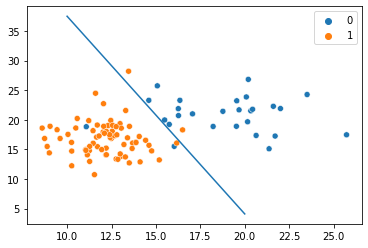

In [19]:
sns.scatterplot(x=cancer.data[300:400,0],y = cancer.data[300:400,1],hue=cancer.target[300:400])
sns.lineplot(x1,x2)

In [20]:
# 用全量数据，L1 OR L2 训练模型
# xtest 20%

In [21]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(cancer.data,cancer.target,test_size = 0.2)

In [22]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler().fit(xtrain)

xtrain_ = std.transform(xtrain)
xtest_ =std.transform(xtest)

In [23]:
LR = LogisticRegression(penalty='l1',solver='liblinear').fit(xtrain_,ytrain)

In [24]:
LR.score(xtest_,ytest)

0.9824561403508771

In [25]:
y_hat = LR.predict(xtest_)

In [26]:
y_hat!=ytest

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

(array([36.,  2.,  0.,  2.,  0.,  2.,  1.,  3.,  3., 63.]),
 array([8.99199646e-14, 9.99999155e-02, 1.99999831e-01, 2.99999746e-01,
        3.99999662e-01, 4.99999577e-01, 5.99999493e-01, 6.99999408e-01,
        7.99999324e-01, 8.99999239e-01, 9.99999155e-01]),
 <BarContainer object of 10 artists>)

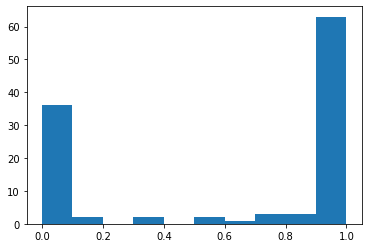

In [27]:
plt.hist(LR.predict_proba(xtest_)[y_hat==ytest][:,1])

In [28]:
def sigmoid(x):
    y = 1/(1+np.exp(-x))
    return y

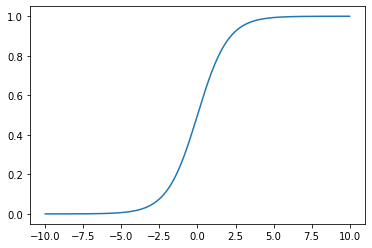

In [29]:
x = np.linspace(-10,10,300)
plt.plot(x,sigmoid(x))

In [31]:
# import scikitplot as skplt

 
# vali_proba_df = pd.DataFrame(lr.predict_proba(vali_data.iloc[:,:-1]))
# skplt.metrics.plot_roc(vali_data.iloc[:,-1], vali_proba_df,
#                         plot_micro=False,figsize=(6,6),
#                         plot_macro=False)

In [ ]:
# 目前的模型：LR
# 测试集 xtest_，ytest

In [41]:
from sklearn.metrics import confusion_matrix  # 混淆矩阵
from sklearn.metrics import recall_score  #查全、召回
from sklearn.metrics import precision_score #准确率
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score 

In [37]:
print(classification_report(ytest,LR.predict(xtest_))) # （真实，预测）

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.99      0.99      0.99        73

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [40]:
confusion_matrix(ytest,LR.predict(xtest_),labels = [1,0]) # 混淆矩阵

array([[72,  1],
       [ 1, 40]], dtype=int64)

In [ ]:
# 查准率
precision_score(    
    #y_true, 真实值
    #y_pred, 预测值
    #pos_label=1  #设定需要计算的分类类型
) 
# F1
f1_score()
# 查全率
recall_scoree()

In [42]:
import scikitplot as skplt

In [58]:
proba = LR.predict_proba(xtest_)

In [51]:
proba = LR.predict_proba(xtest_)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

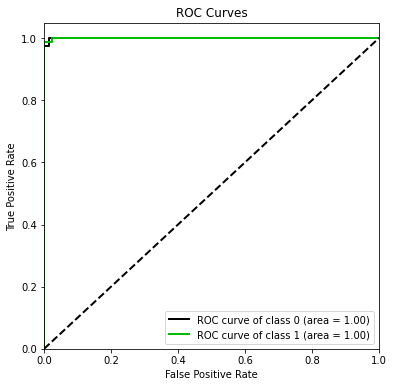

In [56]:
skplt.metrics.plot_roc(ytest,proba,
                      figsize=(6,6),plot_micro=False,
                        plot_macro=False
                        )